# 서울시 범죄 안전 관련 분석

In [135]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rc('font', family='NanumBarunGothic') 


## 서울시 5대 범죄 발생 현황 분석

In [148]:
df = pd.read_csv("data/5대+범죄+발생현황_20220925174326.csv", )
# 데이터 출처 : <https://data.seoul.go.kr/dataList/316/S/2/datasetView.do>
df = pd.read_csv("data/5대+범죄+발생현황_20220925174326.csv", )
df = df.drop(columns=["자치구별(1)"],axis=1)
df = df.set_index("자치구별(2)").T

cols = df.columns.to_list()

cols[0] = "_"
cols[1] = "crime_cat"
cols[2] = "is_solved"

df.columns = cols
del cols
df = df.drop("_", axis=1)

df = df.replace("-", -1)
df.loc[:,"소계":] = df.loc[:,"소계":].astype(int)
df = df.replace(-1, pd.NA)
df.index = df.index.str[:4]
df.index =df.index.astype(int)
df

,crime_cat,is_solved,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2001,소계,발생,154928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,소계,검거,118710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,살인,발생,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,살인,검거,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,강도,발생,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,강간·강제추행,검거,5458,855,128,186,98,224,142,153,...,222,142,93,252,121,351,303,627,235,167
2020,절도,발생,38293,1183,1642,1111,1016,1664,1440,1506,...,1689,1763,999,2188,1341,2229,2021,2951,2429,1640
2020,절도,검거,19705,944,863,534,565,874,713,889,...,1070,1008,553,953,592,1137,960,1491,1006,781
2020,폭력,발생,48344,1711,1576,1617,1223,1676,1784,2022,...,2445,2204,1471,2701,1631,2614,2173,3677,2675,1942


In [150]:
crime_cat = df.crime_cat.unique()
crime_cat

array(['소계', '살인', '강도', '강간·강제추행', '절도', '폭력'], dtype=object)

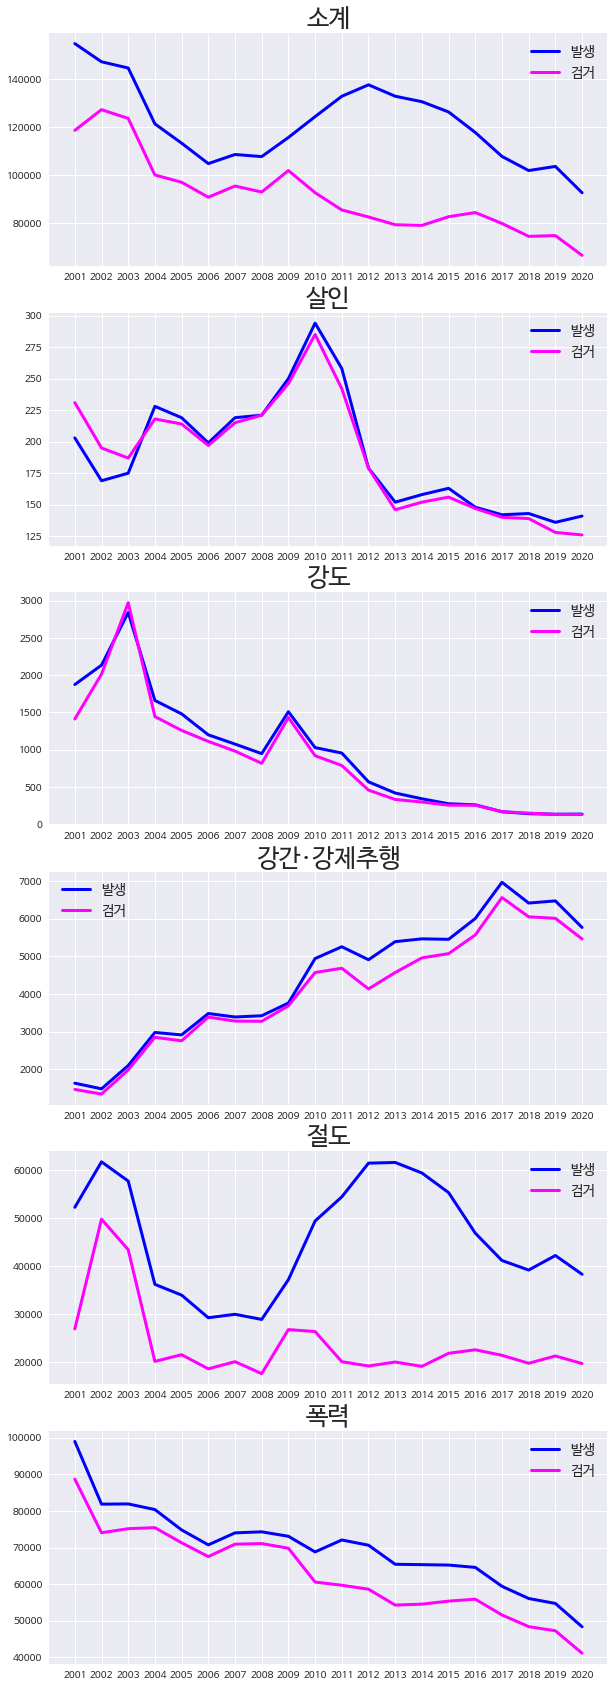

In [151]:
fig, ax = plt.subplots(
    nrows=len(crime_cat), 
    figsize=(10,30),
    subplot_kw={
        "xticks": range(2001, 2021)
    }
)

for i, crime in enumerate(crime_cat):
    df[(df.crime_cat == crime) & (df.is_solved == "발생")]["소계"]\
        .plot(ax=ax[i], linewidth=3, color="blue")
    df[(df.crime_cat == crime) & (df.is_solved == "검거")]["소계"]\
        .plot(ax=ax[i], linewidth=3, color="magenta")
    ax[i].set_title(crime, fontsize=25)
    ax[i].legend(["발생", "검거"], fontsize=14)

del crime_cat

* 서울시 5대 범죄 가운데서 강간강제추행은 지속적으로 늘고 있다.


## 범죄 발생 장소별 통계


In [153]:
df = pd.read_csv("data/경찰청_범죄_발생_장소별_통계/경찰청_범죄발생장소_2017.csv", encoding="cp949")


## 성폭력범죄 발생 시간별 통계

In [156]:
df = pd.read_csv("data/경찰청_성폭력범죄_범죄_발생_시간_현황/경찰청_성폭력범죄 범죄 발생 시간 현황_20201231.csv", encoding="cp949")

In [157]:
df

,구분,심야(00:00~04:00),새벽(04:00~07:00),오전(07:00~12:00),오후(12:00~18:00),초저녁(18:00~20:00),밤(20:00~24:00)
0,2014,642,43,154,185,61,172
1,2015,572,23,141,180,67,152
2,2016,445,43,134,233,74,180
3,2017,467,50,159,273,89,211
4,2018,510,40,196,291,98,230
5,2019,497,62,190,320,125,243
6,2020,771,89,221,440,158,368


## 성폭력범죄 발생 장소별 통계

In [158]:
df = pd.read_csv("data/경찰청_성폭력범죄 범죄 발생 장소별 현황_20201231.csv", encoding="cp949")
df

,구분,"아파트, 주택",노상,"상점, 노점",숙박업소목욕탕,유흥접객업소,역대합실,지하철,기타교통수단내,학교,기타
0,2014,602,53,9,21,15,0,0,1,0,1
1,2015,457,65,11,23,31,1,0,4,37,506
2,2016,463,37,12,16,10,0,0,6,17,548
3,2017,499,42,10,8,10,2,3,8,16,651
4,2018,563,58,19,8,11,1,1,6,18,680
5,2019,578,43,21,6,11,0,0,2,16,760
6,2020,797,53,31,15,21,1,1,5,19,1104


## 서울시 경찰서별 5대범죄 통계

In [179]:
from glob import glob
import json

In [241]:
dfs = []
for p in glob("./data/서울_경찰서별_5대범죄_통계/*.csv"):
    temp = pd.read_csv(p, encoding="cp949").dropna()
    year = p[-8:-4]

    temp["year"] = [year for _ in range(len(temp))] 
    
    dfs.append(temp)

df = pd.concat(dfs).iloc[:, :5]
df = df.sort_values("year").reset_index(drop=True)

In [242]:

with open("./data/지역별관할경찰서/경찰서별관할구역.json", "r", encoding="utf-8") as f:
    juridict1 = json.load(f)
with open("./data/지역별관할경찰서/지역별관할경찰서.json", "r", encoding="utf-8") as f:
    juridict2 = json.load(f)

df["관할구역"] = df["구분"].map(lambda x: juridict1[x])
df = df.groupby(["year", "관할구역",  "죄종", "발생검거",]).sum()
df = df.reset_index()
df = df.rename(columns={"관할구역": "자치구"})
df["관할경찰서"] = df["자치구"].map(lambda x: juridict2[x])
df

,year,자치구,죄종,발생검거,건수,관할경찰서
0,2001,강남구,강간,검거,108.0,"[강남, 수서]"
1,2001,강남구,강간,발생,157.0,"[강남, 수서]"
2,2001,강남구,강도,검거,151.0,"[강남, 수서]"
3,2001,강남구,강도,발생,217.0,"[강남, 수서]"
4,2001,강남구,살인,검거,23.0,"[강남, 수서]"
...,...,...,...,...,...,...
4997,2020,중랑구,살인,발생,10.0,[중랑]
4998,2020,중랑구,절도,검거,889.0,[중랑]
4999,2020,중랑구,절도,발생,1506.0,[중랑]
5000,2020,중랑구,폭력,검거,1724.0,[중랑]


In [ ]:
df.to_csv("01-20_자치구별_5대범죄.csv", index=False)